# UVP projektna naloga

## Analiza nakaterih osnovnih podatkov o avomobilih
#### Luka Urbanč

V projektni nalogi analiziram in prikazem nekaj povezav med podatki, ki sem jih pridobil iz spletnih strani. Preden se lotimo analize, bi naprej postavil nekaj hipotez glede podatkov: 
 - povprecna cena bo okoli 40000eur
 - najvec bo motorjev s stirimi cilindi
 - hitrejsi avti bodo drazji
 - najbolj pogosta prostornina bo manjsa ali enaka dvem litrom
 - najboljs pogosto stevilo prestav bo 6
 - vecina avtov bo imela le predni pogon


### Naprej je potrebno pridobiti podatke s spletne strani. To storimo tako, da poženemo program *main.py* in sledimo navodilom v njemu. 
Ko smo to opravili se lahko lotimo nase analize podatkov.
Naprej nalozimo podatke iz .csv datoteke, ki jo je ustvaril main.py. Poglejmo, kako izgleda in katere podatke sploh imamo na voljo, se pred tem pa uvozimo vse, kar potrebujemo za delo:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

podatki_o_avtih = pd.read_csv("data.csv")
podatki_o_avtih.head()

,Id,Price (EUR),Transmission,Number of gears,Body Type,Number of seats,Drive wheel,Fuel Type,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
0,1,23200,5 speed manual transmission,5,"3-doors, hatchback",4,front,gasoline,4,1368,135,206,205.0,7.9,6.5
1,2,25500,5 speed manual transmission,5,"3-doors, convertible",4,front,gasoline,4,1368,135,206,205.0,7.9,6.5
2,4,21990,6 speed manual transmission,6,"3-doors, hatchback",4,front,gasoline,4,1368,155,201,208.0,8.2,6.9
3,5,24545,6 speed manual transmission,6,"3-doors, hatchback",4,front,gasoline,4,1368,165,250,213.0,7.9,6.0
4,7,30000,5 speed manual transmission,5,"5-doors, station wagon",5,front,gasoline,4,1970,165,206,220.0,8.2,8.9


Seveda nas najprej zanima, koliko podatkov sploh imamo na voljo. Število unikatnih avtomobilov, za katere imamo podatke je enostavno dobiti, stevilo podatkov pa je zmnozek stevila vrstic in stevila stolpcev. Dolžina naše .csv datoteke je:

In [21]:
print(len(podatki_o_avtih.index))

48


In [20]:
print(f"Skupaj imamo torej {len(podatki_o_avtih) * len(podatki_o_avtih.index)} podatkov")

Skupaj imamo torej 2304 podatkov


Naša .csv datoteka torej očitno vsebuje kar precej podatkov. Poglejmo si nekaj hipotez za te podatke.
Za veliko večino ljudi je cena en izmed odločilnih kriterijev, ko se odločajo za nakup novega avtomobila, zato je smiselno vedeti, ali je avto nad- ali podpovprečno drag. 
Poglejmo si povprečje cene vseh avtomobilo, nato pa še razporeditev cen v grafu:



In [23]:
print(f"Povprecna cena avtomobila je tako {round(podatki_o_avtih["Price (EUR)"].mean(), 2)}, EUR")


Povprecna cena avtomobila je tako 22362.4, EUR


Poglejmo si se graf cene vseh avtomobilov in cena v odvisnosti od najvisje hitrosti:

<Axes: xlabel='Top Speed', ylabel='Price (EUR)'>

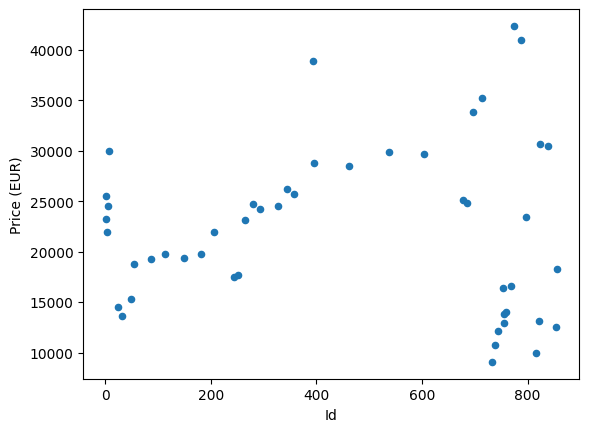

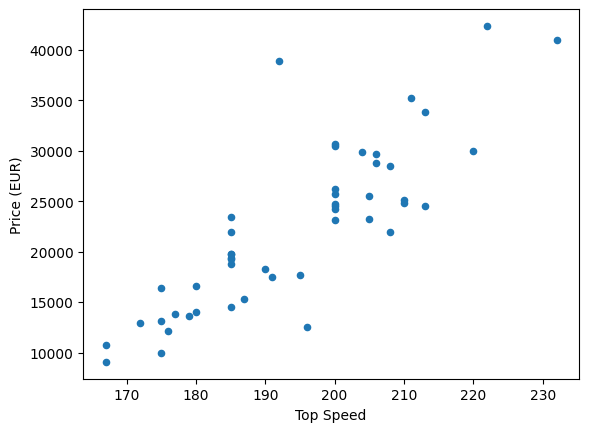

In [24]:
podatki_o_avtih.plot.scatter(x="Id", y="Price (EUR)")
podatki_o_avtih.plot.scatter(x="Top Speed", y="Price (EUR)")

Vidimo, da so v splosnem hitrejsi avtomobili drazji, kar nas seveda ne preseneca, med ceno in najvisjo hitrostjo pa lahko ugibamo, da imamo linearno odvisnost: drazji avtomobili so hitrejsi.


Seveda so zanimivi tudi ostali podatki, kot so povprecno stevilo cilindrov v motorju, navor, najvisja hitrost, pospesek in kombinirane porabe. Tudi te lahko enostavno dobimo:

In [126]:
print(f"Povprecno stevilo cilindrov: {round(podatki_o_avtih["Number of Cylinders"].mean(), 2)}")
print(f"Povprecen navor: {round(podatki_o_avtih["Max Torque"].mean(), 2)} Nm")
print(f"Povprecna najvisja hitrost: {round(podatki_o_avtih["Top Speed"].mean(), 2)} km/h")
#print(f"Povprecen pospesek: {podatki_o_avtih["Acceleration to 100km/h"].mean()} s")
print(f"Povprecna kombinirana poraba: {round(podatki_o_avtih["Combined consumption l/100km"].mean(), 2)} l/100km")

Povprecno stevilo cilindrov: 5.23
Povprecen navor: 297.9 Nm
Povprecna najvisja hitrost: 224.08 km/h
Povprecna kombinirana poraba: 9.33 l/100km


Predstavimo lahko tudi pogostost vrste menjalnika, goriva, oblike in stevila prestav:

<Axes: ylabel='Transmission'>

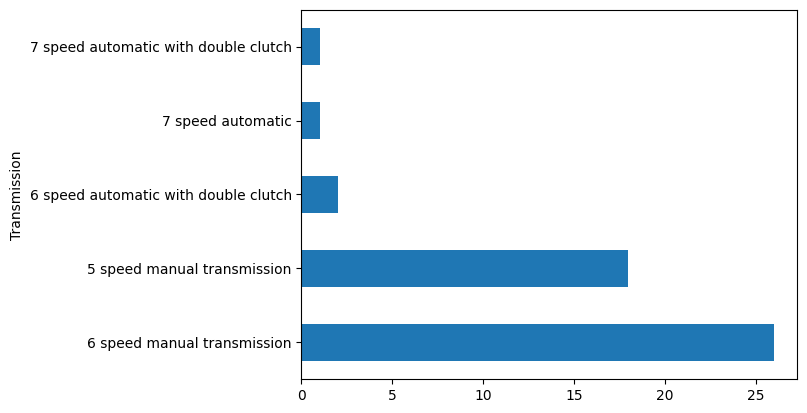

In [136]:
transmission = podatki_o_avtih["Transmission"].value_counts()
transmission.plot.barh()

<Axes: ylabel='Number of gears'>

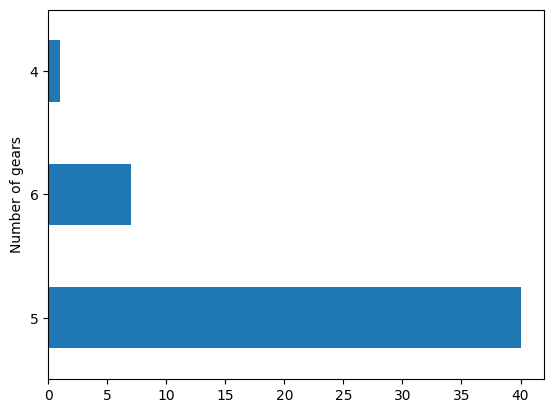

In [28]:
num_of_gears = podatki_o_avtih["Number of Gears"].value_counts()
num_of_gears.plot.barh()

<Axes: ylabel='Fuel Type'>

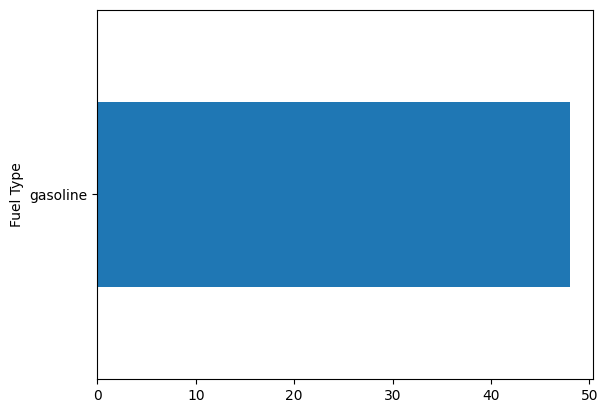

In [137]:
fuel = podatki_o_avtih["Fuel Type"].value_counts()
fuel.plot.barh()

<Axes: ylabel='Body Type'>

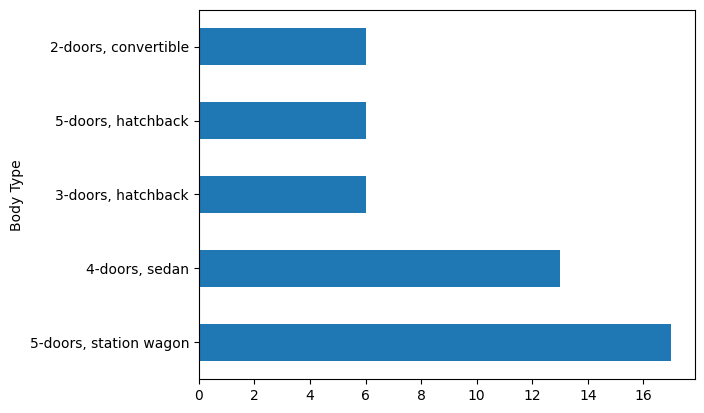

In [138]:

body = podatki_o_avtih["Body Type"].value_counts()
body.plot.barh()

<Axes: ylabel='Drive wheel'>

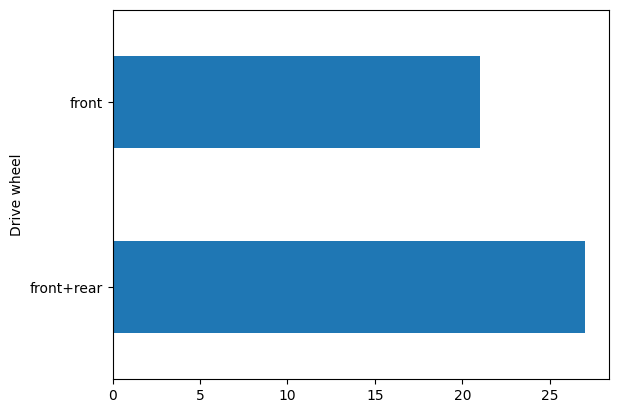

In [139]:
drive = podatki_o_avtih["Drive wheel"].value_counts()
drive.plot.barh()

<Axes: ylabel='Number of Cylinders'>

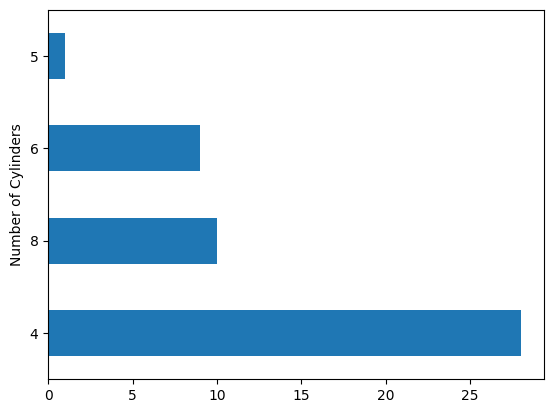

In [141]:
cyl = podatki_o_avtih["Number of Cylinders"].value_counts()
cyl.plot.barh()

<Axes: ylabel='Volume of engine'>

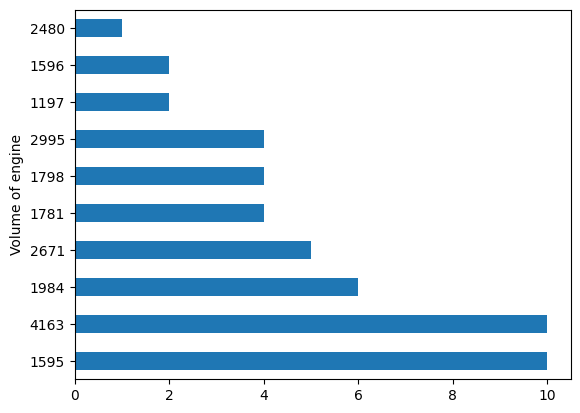

In [142]:
vol = podatki_o_avtih["Volume of engine"].value_counts()
vol.plot.barh()

## Druge zanimivosti
Lahko si pogledamo tudi, ali obstaja kaksna povezava med prostornino motorja in ceno. Podobno kot pri hitrosti pricakujemo, da bodo vecje prostornine pomenile drazji avto. Podobno se prepricamo se o vplivu prostornine motorja na porabo. Jasno je tudi, da imajo dizelski motorji vec navora kot bencinski, kar nam prav tako pokaze graf.

<Axes: xlabel='Fuel Type', ylabel='Max Torque'>

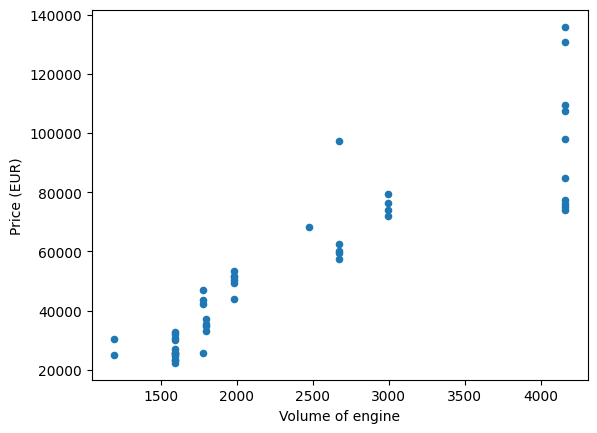

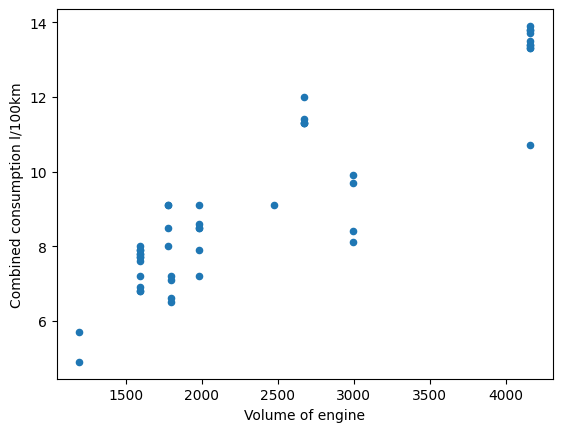

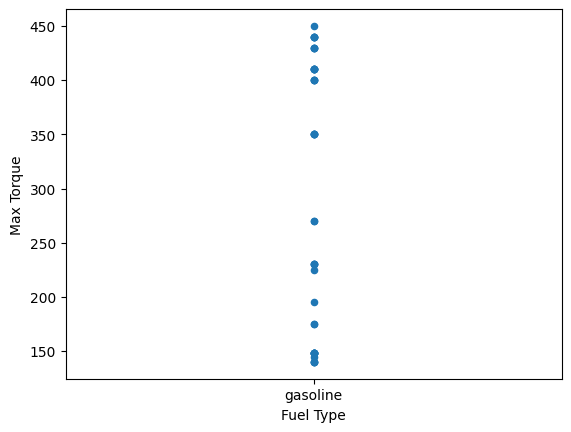

In [161]:
podatki_o_avtih.plot.scatter(x="Volume of engine", y="Price (EUR)")
podatki_o_avtih.plot.scatter(x="Volume of engine", y="Combined consumption l/100km")
podatki_o_avtih.plot.scatter(x="Fuel Type", y="Max Torque")


## Najbolj pogost avto
Z danimi podatki lahko sestavimo tudi "Najbolj pogost avto", tako da za njegove lastnosti vzamemo najbolj pogosto v vsaki kategoriji, pri stevilcnih kategorijah pa jemljemo povprecja.

In [46]:
sez = []
for element in list(podatki_o_avtih.columns):
    try:
        var = podatki_o_avtih[element].value_counts().index[0]
    except:
        var = podatki_o_avtih[element].median()
    print(f"{element}: {var}")

Id: 1
Price (EUR): 23200
Transmission: 5 speed manual transmission
Number of gears: 5
Body Type: 4-doors, sedan
Number of seats: 5
Drive wheel: front
Fuel Type: gasoline
Number of Cylinders: 4
Volume of engine: 1598
Power: 120
Max Torque: 140
Top Speed: 185.0
Acceleration to 100km/h: 11.3
Combined consumption l/100km: 8.2


### Korelacije med vsemi parametri
Seveda nas zanima tuki, kako sprememba enega parameta vpliva na spremembo drugega. V namen boljsega razumevanja teh odnosov, si narisimi se korelacijsko matriko, ki ima na *i,j-tem* mestu koeficient korelacije med parametrom v vrstici i in parametrom v stoplcu j. Koeficient korelacije je stevilo med -1 in 1, ki nam opisuje, kako povezani stva dve spremenljivki. 1 pomeni, da se druga pri spremembi prve prav tako enako spremeni, -1 pa se obratno spreminja. 0 pomeni, da ni nekaga vzorca - enkrat se spreminja skupaj, drugic pada, tretjic se ne spremeni sploh. Ocitno bo taka matrika enaka svoji transponiranki, po diagonali bodo pa same enke. Tako matriko se vedno splaca tudi ustrezno pobarvati, zato da hitro opazimo kaksne zanimive povezave. To lahko pocnemo le z numericnimi podatki, zato izlocimo ostale, ki so tipa "string"

Text(0.5, 1.0, 'Korelacijska matrika za podatke o avtomobilih')

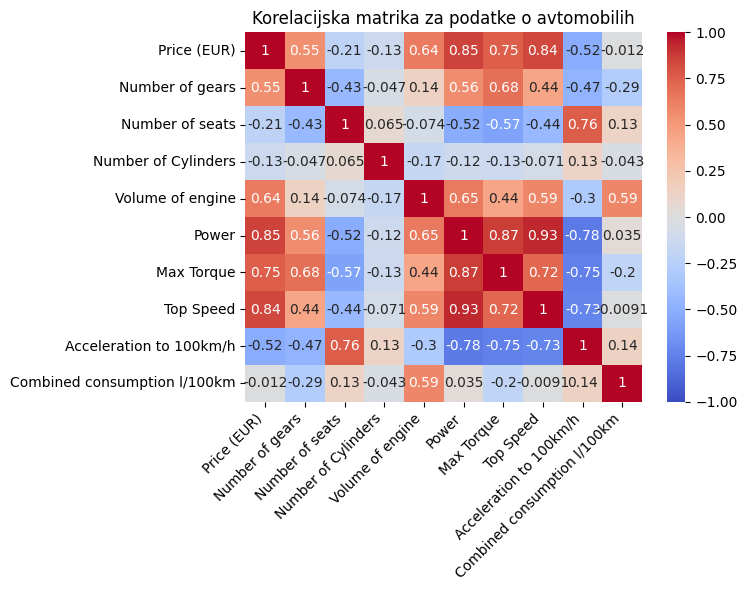

In [36]:
numeric_values = podatki_o_avtih.select_dtypes(include=np.number)
numeric_values =numeric_values.drop("Id", axis="columns")
matrix = numeric_values.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.title("Korelacijska matrika za podatke o avtomobilih")


Opazimo lahko mocno povezavo med ceno in najvisjo hitrostjo ter med ceno in pospeskom do 100km/h. Ta povezava ni presenetljiva, saj so bolj zmogljivi avotomobili navadno drazji. Opazimo lahko tudi, da vec sedezev v avtomobilu vecinoma pomeni tudi pocasnejsi pospesek do 100km/. To nas seveda ne preseneca, saj je avto z vecimi sedezi obicajno tezji. Zanimivo se mi zdi, da poraba avtomobila prakticno nima nobene korelacije z ostalimi spremenljivami, razen volumnom motorja. 

Sedaj se lahko vrnemo tudi na zacetne hipoteze in preverimo njihovo veljavnost.
